# 03. Model Training and Improvement



When making the project and anything really, set numpy.random.seed so the work is reproducible!

Use Docker\
Use MlFlow\
Use Scikit-Learn Pipeline for Data Processing

Scikit-learn has [pipelines](https://scikit-learn.org/1.5/modules/generated/sklearn.pipeline.Pipeline.html). We can export the pipeline that transforms the data with the model. This way we have reproducibility and if we want to add/remove more data we can easily apply the pipeline transformations and just run the model again. 

Estimator - in ScikitLearn is everything that has fit/transform. We chain these in pipelines\
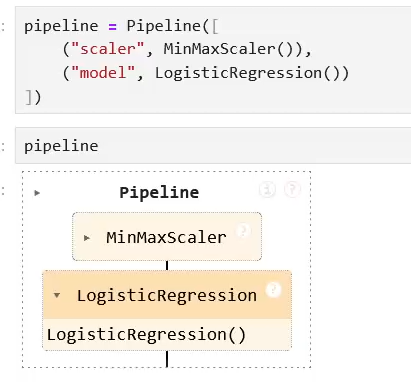

make_column_selector and ColumnTransformer allow us to take the columns we want and do our own transformations only on them whithin a pipeline. Use this with OneHotEncode()\
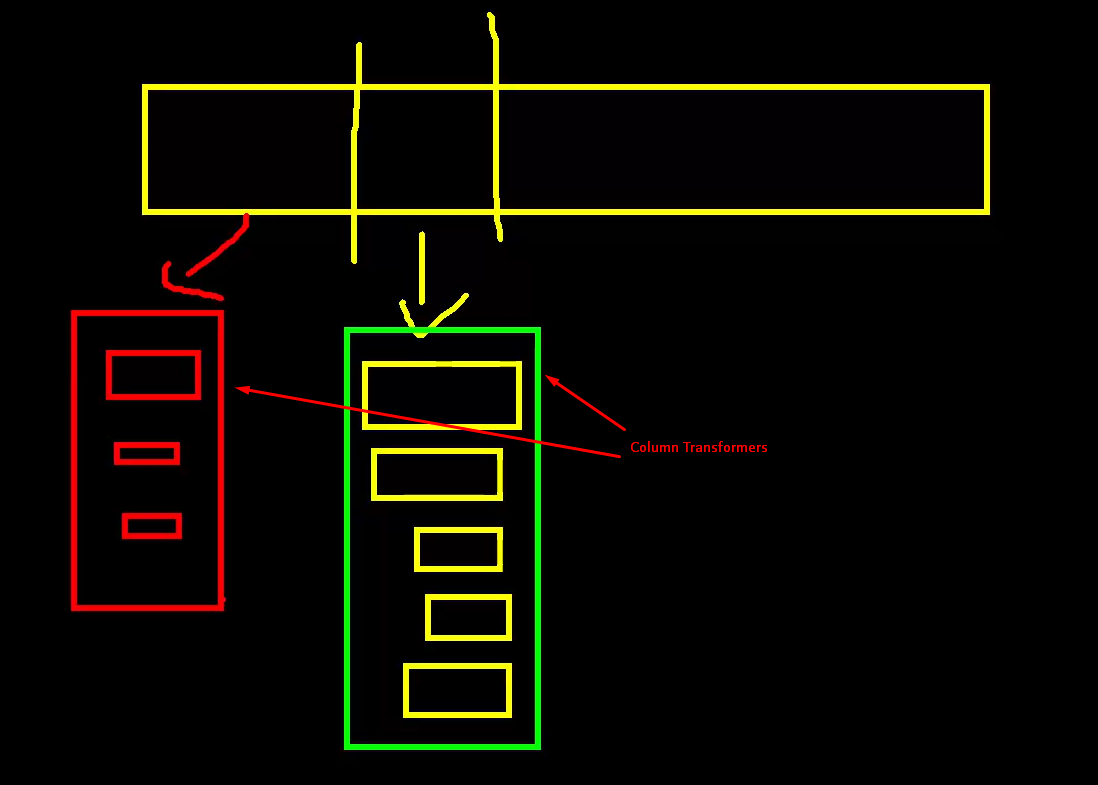

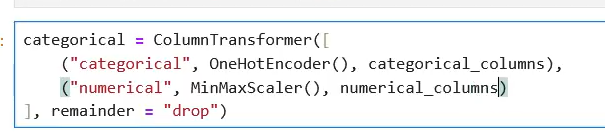

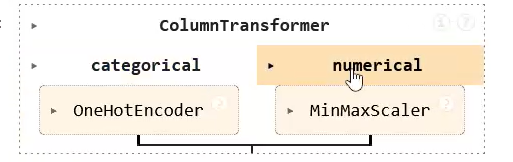

FunctionTransformare - allows us to do user defined custom transformations on the data. If we have something that scikit learn doesnt give us we can do it with this

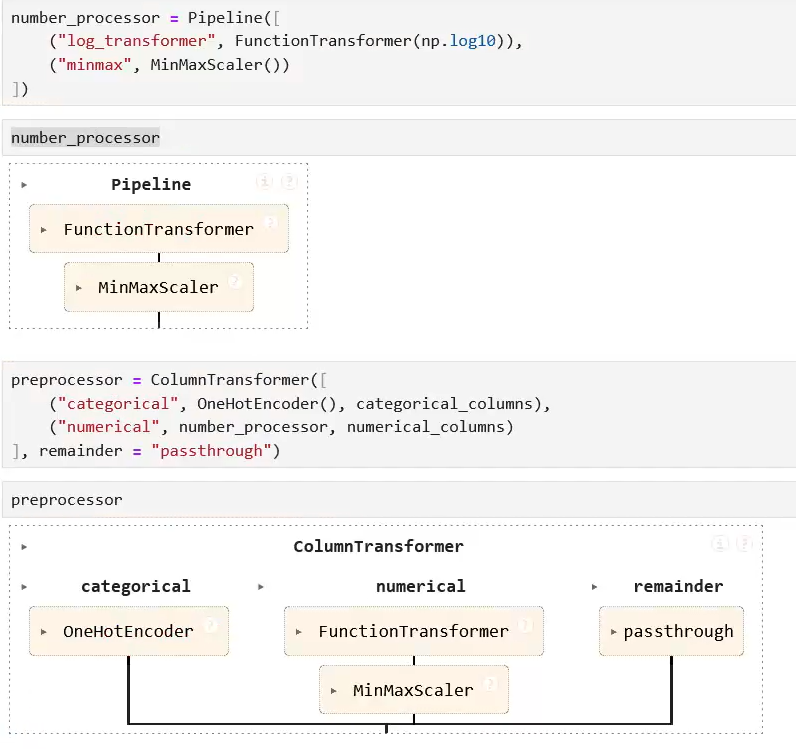

 ## How to save the model

 pickle - It saves the RAM bytes as a file and our model lives in the RAM.

In [ ]:
pickle.dump(logistic_regression, open("prediction_pipeline.pkl", "wb"))
# wb - wrtie binary

If we have a custom function in the pipeline, pickle wont work.

## Definitions

- ``` Machine Learning - the process we follow to get accurate approximators which work in practice```\
- Loss Function != Metric
- Irreducible Error / Noise / [Bayesian optimal error](https://towardsdatascience.com/what-is-bayes-error-4bfadcc9c0ad) - a threshhold of a metric (accuracy lets say) that we cant get past because of the noise the data has. We cant predict with a 100% certainty
    - ``` The Bayes Error of a dataset is the lowest possible error rate that any model can achieve ```
    - In particular, if the Bayes Error is non-zero, then the two classes have some overlaps, and even the best model will make some wrong predictions.
    - We cant measure it. We don't know what is the best performance the model can extract from the data.
 
  - [Variance](https://www.bmc.com/blogs/bias-variance-machine-learning/#:~:text=Bias%20creates%20consistent%20errors%20in,points%20that%20do%20not%20exist.) / Statistical Error - ``` Variance is an error caused by an algorithm that is too sensitive to fluctuations in data, creating an overly complex model that sees patterns in data that are actually just randomness. ```
    - Randomly something happened that we didnt expect (train on - a little different data comes in than the one we trained on)
    - Uncontrolled, random event. Outside of our model error.
  - [Bias](https://www.bmc.com/blogs/bias-variance-machine-learning/#:~:text=Bias%20creates%20consistent%20errors%20in,points%20that%20do%20not%20exist.) / Assumption Error - ``` Bias refers to error caused by a model for solving complex problems that is over simplified, makes significant assumptions, and misses important relationships in your data ``` 
    - The models's error. It is our fault.
    - We might have trained on only part of the population and have some "bias" towards the data we have. We miss out on the rest of the data.
    - We might have a bad learning process
  - Bias–variance tradeoff - ``` Minimizing errors caused by oversimplification and excessive complication requires finding the right balance or tradeoff between the two. ```

Variance = Chaos / unpredictability
 
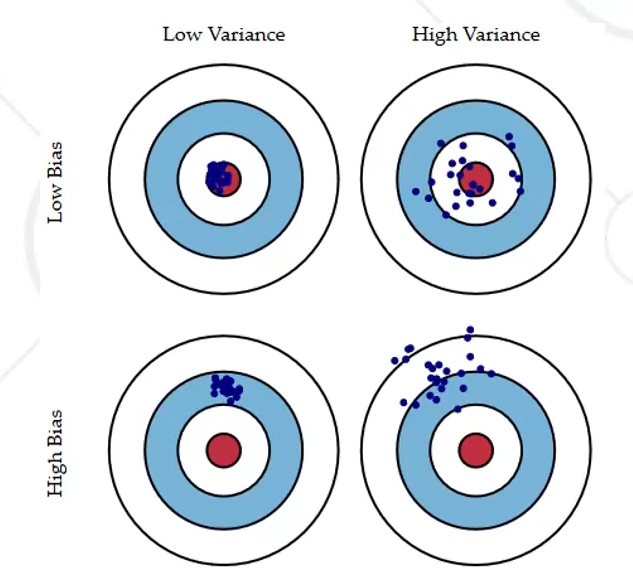

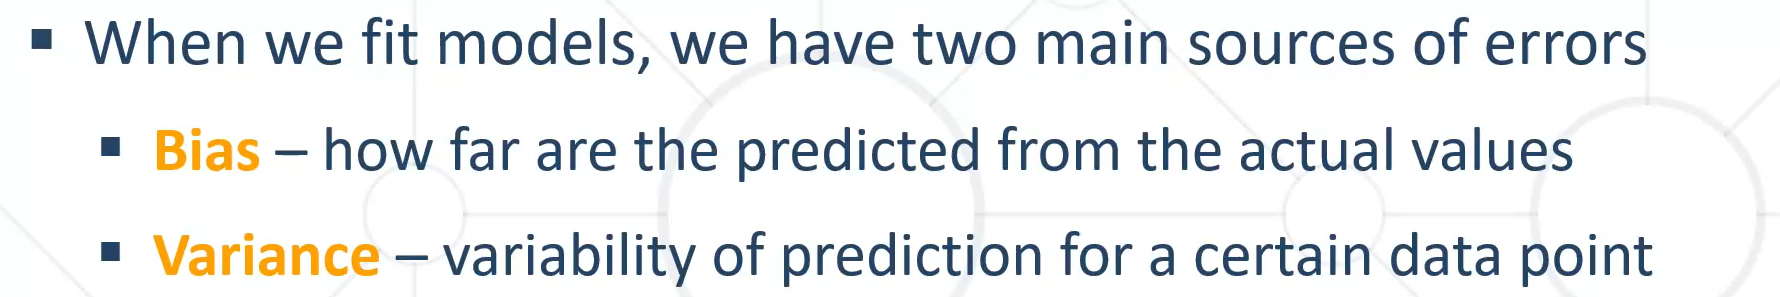

## Bias-Variance tradeoff?

It is not a tradeoff. Because when we increase one the other doesnt always decrease. \
The bias and the tradeoff exist, the question is how much 

```
high-bias / low variance - the model under-fits the data
low bias / high variance - the model over-fits the data
```

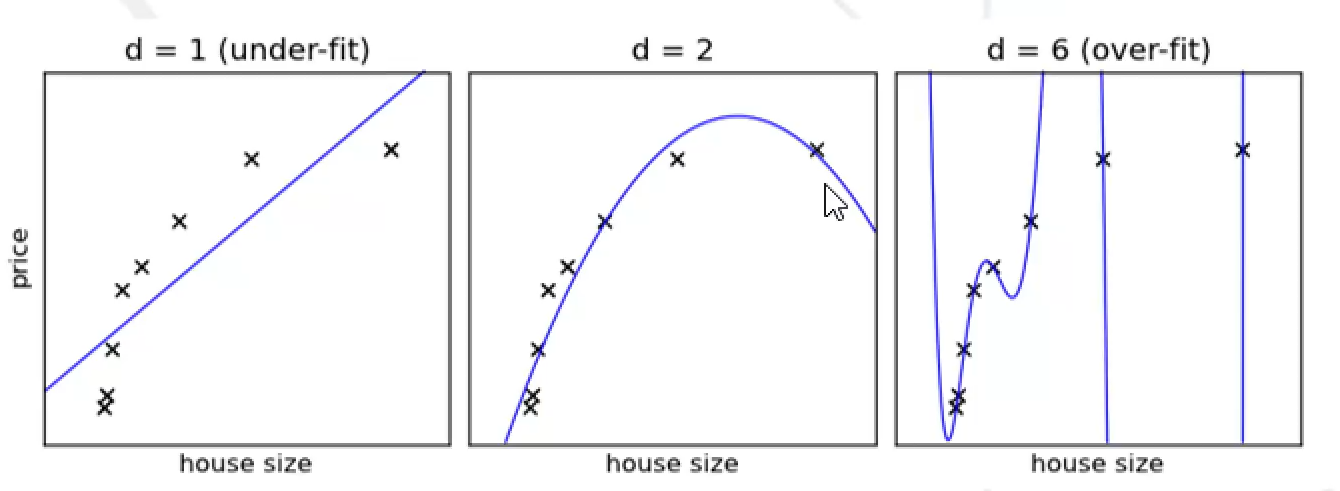

 - high bias - the algo doesn't recognize well even the data that it is trained on
 - high variance - knows the data well but it is chaotic ( on new data ) 

## Controlling the bias/variance
```To convert a model from the left (under-fit) to the right (over-fit) we need to choose a model with a higher capacity, more statistical power.```\
```To convert a model from the right (over-fit) to the left (under-fit) we regularize it. We make it dumber. We do this with hyperparams.```

abs## Regulrization
Method for finding a good bias-variance tradeoff

Make the optimising function more regular. Allow it to make less curves. Make it dumber.

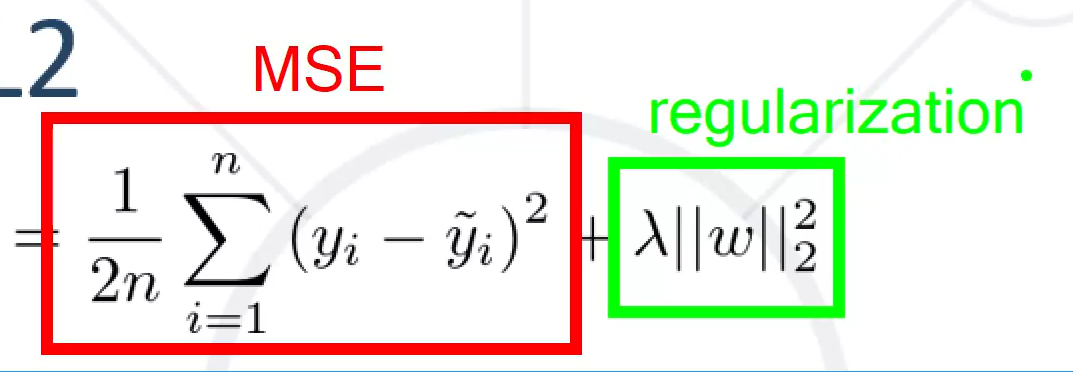

The optimizing function has to find the least error = prediction - actual value AND for w1, w2 .... wN params. (lets say linear regression coef). This way it it trying to look for a small error and at the same time small coef for every feature. We are adding a constraint. This will make the curves smaller hence the variance drops and the bias raises.

We are adding bias with regularization. We are literally adding 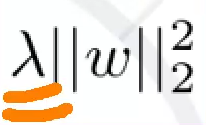


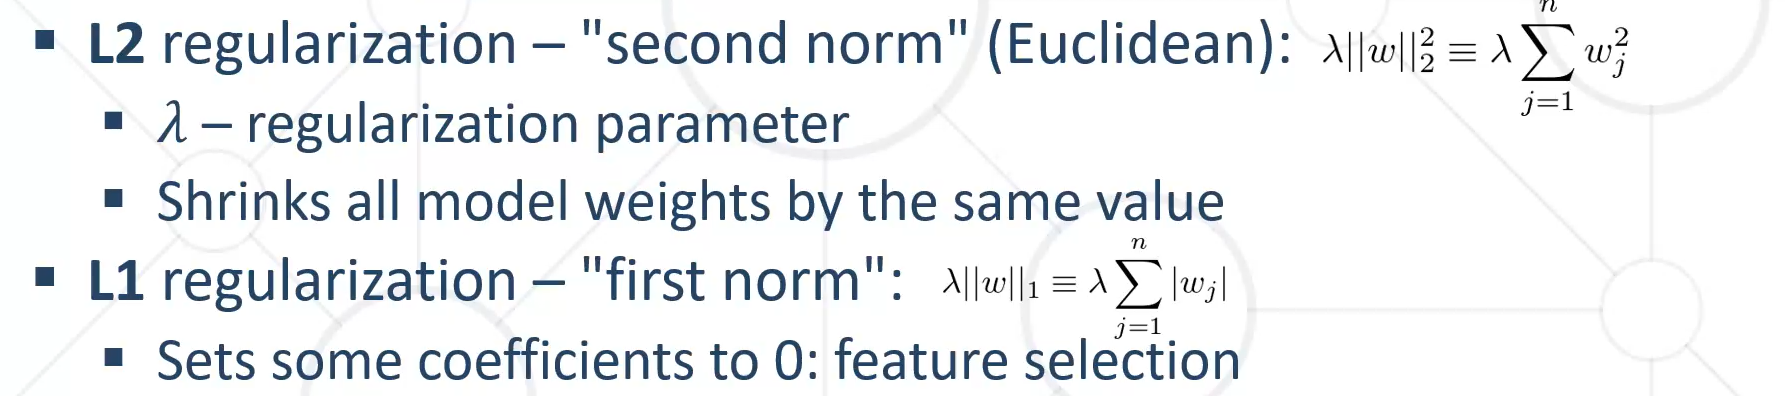

### [Types of regularization](https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c):
- L0 - number of non zero coef
    - not used at all
- L1 - adds “absolute value of magnitude” of coefficient as penalty term to the loss function.
    - Lasso (Least Absolute Shrinkage and Selection Operator) Regularization
    - less used
    - ```sets some coef to 0```
- L2 - adds “squared magnitude” of coefficient as penalty term to the loss function
    - Ridge Regularization
    - most commonly used
    - ```shrinks all model weigths by the same value```
 
ElasticNet - both L1 and L2 reg 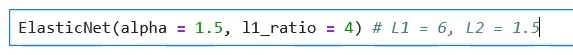
```
The key difference between these techniques is that Lasso shrinks the less important feature’s coefficient to zero thus, removing some feature altogether. So, this works well for feature selection in case we have a huge number of features.
```

#### For Logistic Regression

We have penalty= {l1, l2} and C = 1/alpha as hyperparams to add regularization

## Training and Testing Sets

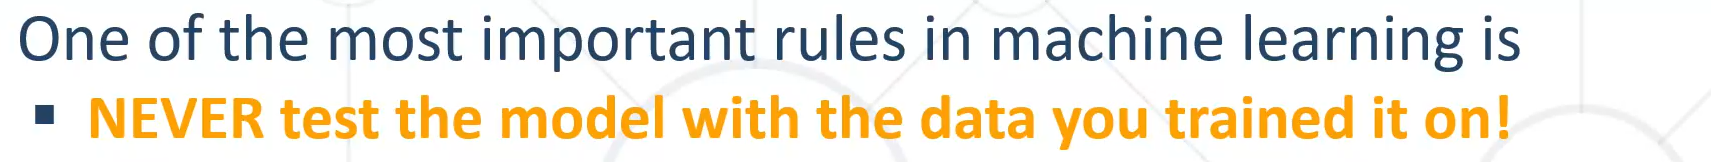


For classification we need stratified samples

train_test_split - Param shuffle = False/True it shuffles or it doesnt shuffle the same way. Meaning it saves a lot of coding. The attributes and target variables are shuffled the same way.

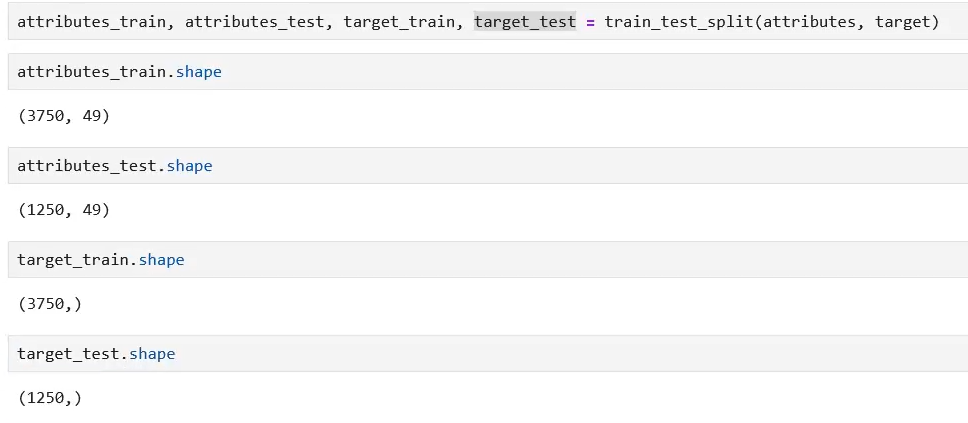

## So how do we split train/test in terms of ration?
- The more for training we have the better the model will learn the problem
- The more for testing the more we will be sure it performs robustly on unseen data

```We want as many of the data points seprated for testing as possible and for the remaining test set we want to be sure of their quality and quantity```

```The minimum amount for the test set is such that the [Law of Large Numbers](https://www.investopedia.com/terms/l/lawoflargenumbers.asp#:~:text=The%20law%20of%20large%20numbers%20states%20that%20an%20observed%20sample,as%20the%20sample%20grows%20larger.) works```

Examples:
Good example\
Dataset: 10 000 points\
Train: 8 000\
Test: 2 000

Bad example\
Dataset: 1 000 000 points\
Train: 700 000\
Test: 300 000

Better:
Dataset: 1 000 000 points\
Train: 990 000\
Test: 10 000

```It is not the percentage of the whole dataset that matters it is the count of the data points in the test split AND THE QUALITY!!!```

What does quality mean?\
It means each edge case to be represented in both train/test sets.\
In photography: in all weather conditions, all light conditions dark/light pics etc.\
In text: emoticons, sarcasm, irony etc.

### How do we set it?

Use param test_size = 10000 for example. We care firstly for the test to be enough in size and for the train w/e is left.\
Or with proportion test_size = 0.1